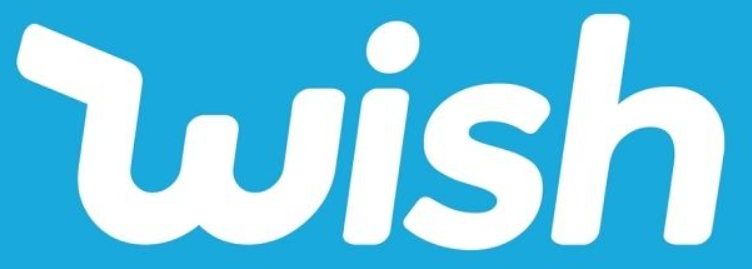

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, LassoCV,Lasso,ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

sns.set()

# EXPLORATION ET NETOYAGE DU JEU DE DONNEES

In [2]:
# Chargement et lecture du fichier
df = pd.read_csv('data_wish.csv').reset_index()

# Resumé statistique des variables
df.describe()

,index,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,...,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1528.000000,1528.000000,1528.000000,...,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,473.0,1.573000e+03,1573.000000,1573.000000
mean,786.000000,8.325372,23.288620,4339.005086,0.432931,3.820896,889.659250,442.263743,179.599476,134.549738,...,0.012715,33.081373,2.345200,0.002543,40.456453,49.821360,1.0,2.649583e+04,4.032345,0.143675
std,454.230301,3.932030,30.357863,9356.539302,0.495639,0.515374,1983.928834,980.203270,400.516231,311.690656,...,0.112075,21.353137,1.024371,0.050379,20.301203,2.562799,0.0,7.847446e+04,0.204768,0.350871
min,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,6.000000,1.000000,1.0,0.000000e+00,2.333333,0.000000
25%,393.000000,5.810000,7.000000,100.000000,0.000000,3.550000,24.000000,12.000000,5.000000,4.000000,...,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.987000e+03,3.917353,0.000000
50%,786.000000,8.000000,10.000000,1000.000000,0.000000,3.850000,150.000000,79.000000,31.500000,24.000000,...,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,7.936000e+03,4.040650,0.000000
75%,1179.000000,11.000000,26.000000,5000.000000,1.000000,4.110000,855.000000,413.500000,168.250000,129.250000,...,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.456400e+04,4.161797,0.000000
max,1572.000000,49.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,11548.000000,4152.000000,3658.000000,...,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,5.000000,1.000000


In [3]:
# Affichage des 5 premières lignes du dataframe
df.head(5)

,index,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [4]:
# Information sur les variables du dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 44 columns):
index                           1573 non-null int64
title                           1573 non-null object
title_orig                      1573 non-null object
price                           1573 non-null float64
retail_price                    1573 non-null int64
currency_buyer                  1573 non-null object
units_sold                      1573 non-null int64
uses_ad_boosts                  1573 non-null int64
rating                          1573 non-null float64
rating_count                    1573 non-null int64
rating_five_count               1528 non-null float64
rating_four_count               1528 non-null float64
rating_three_count              1528 non-null float64
rating_two_count                1528 non-null float64
rating_one_count                1528 non-null float64
badges_count                    1573 non-null int64
badge_local_product             1573 non-nul

✔ **Préparation des colonnes pertinentes à garder**

In [5]:
#Préparation des colonnes pertinentes à garder
df=df.drop(["index","title","tags","shipping_is_express","merchant_name","merchant_info_subtitle","merchant_id","merchant_has_profile_picture","merchant_profile_picture","product_url","product_id","theme","crawl_month","merchant_title","product_picture"],axis=1)

✔ **Vérification des doublons**

In [6]:
#Vérification des doublons
df.duplicated().sum()

34

✔ **Suppression des doublons**

In [7]:
# Supprimons les doublons
df = df.drop_duplicates()
#Verifions la suppression des doublons
df.duplicated().sum()

0

*  Il existe 34 doublons dans notre jeu de données

✔ **Vérification des valeurs manquates**

In [8]:
#Vérification des valeurs manquates
df.isnull().sum()

title_orig                        0
price                             0
retail_price                      0
currency_buyer                    0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
rating_five_count                43
rating_four_count                43
rating_three_count               43
rating_two_count                 43
rating_one_count                 43
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
product_color                    41
product_variation_size_id        14
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner             1071
urgency_text                   1071
origin_country                   16
merchant_rating_count       

✔ **Remplacer les valeurs manquantes**

In [9]:
df["product_color"] = df["product_color"].fillna("Autres")
df["has_urgency_banner"] = df["has_urgency_banner"].fillna(0)
df["urgency_text"] = df["urgency_text"].fillna("Non")
df["origin_country"] = df["origin_country"].fillna("Autres")
df["rating_five_count"] = df["rating_five_count"].fillna(0)
df["rating_four_count"] = df["rating_four_count"].fillna(0)
df["rating_three_count"] =df["rating_three_count"].fillna(0) 
df["rating_two_count"] =df["rating_two_count"].fillna(0)
df["rating_one_count"] =df["rating_one_count"].fillna(0)
df["product_variation_size_id"] =df["product_variation_size_id"].fillna(0)

✔ **Vérification des données sur notre DataFrame : est-ce propre ?**

In [10]:
df.isnull().sum()

title_orig                     0
price                          0
retail_price                   0
currency_buyer                 0
units_sold                     0
uses_ad_boosts                 0
rating                         0
rating_count                   0
rating_five_count              0
rating_four_count              0
rating_three_count             0
rating_two_count               0
rating_one_count               0
badges_count                   0
badge_local_product            0
badge_product_quality          0
badge_fast_shipping            0
product_color                  0
product_variation_size_id      0
product_variation_inventory    0
shipping_option_name           0
shipping_option_price          0
countries_shipped_to           0
inventory_total                0
has_urgency_banner             0
urgency_text                   0
origin_country                 0
merchant_rating_count          0
merchant_rating                0
dtype: int64

✔ **Focus sur la colonne 'Rating'**

In [11]:
# Exploration de la colonne 'Rating' qui est l'Évaluation des articles par  les consommateurs et arrondi.
df['rating']=df['rating'].apply(lambda x: round(x,1))
df.rating.value_counts()

4.0    178
3.7    138
4.1    133
3.8    131
3.9    127
4.2    126
3.6    106
3.5     94
3.4     69
4.3     68
5.0     65
3.3     56
3.1     43
3.2     40
4.4     30
3.0     28
4.5     25
2.9     14
2.8     12
4.6      9
2.0      8
2.7      8
4.7      7
4.8      7
2.6      4
1.0      3
2.5      3
2.4      2
1.5      2
2.3      1
4.9      1
2.2      1
Name: rating, dtype: int64

# DATAVISUALISATION               👀  

✔ **Focus sur la colonne 'Note'**    

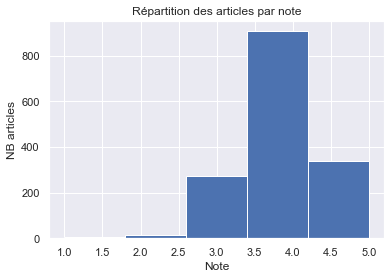

In [12]:
#Répartition des articles par note
plt.hist(df.rating,bins = 5)
plt.title("Répartition des articles par note")
plt.xlabel('Note')
plt.ylabel('NB articles')
plt.show()
# L'histogramme nous montre que les articles sont pour la majeure partie notés entre 3,6 et 4,2.

✔ **Focus sur la colonne 'Rating'**

In [13]:
df.rating.describe()

count    1539.000000
mean        3.824042
std         0.508721
min         1.000000
25%         3.500000
50%         3.900000
75%         4.100000
max         5.000000
Name: rating, dtype: float64

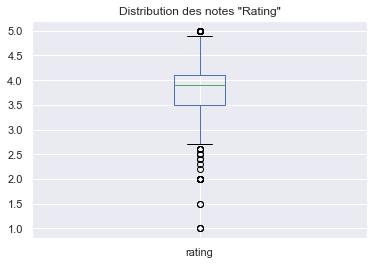

In [14]:
# Distribution des notes 'Rating'

# boîte à moustaches:  La médiane est de 3.9 
# Le min est de 1 ert le max de 5.
# Nous constatons des valeurs minimum entre 1 et 2.7.  
# La boite à moustache vient confirmer les données de l'histogramme ci desus c'est a dire que les
# les articles sont dans l'ensemble bien notés.  Il y a quelques notes inférieurs à 2.7, mais cela reste très faible.

df.boxplot(column = 'rating')
plt.title('Distribution des notes "Rating"')
plt.show()

✔ **Focus sur la colonne 'Units_sold'**

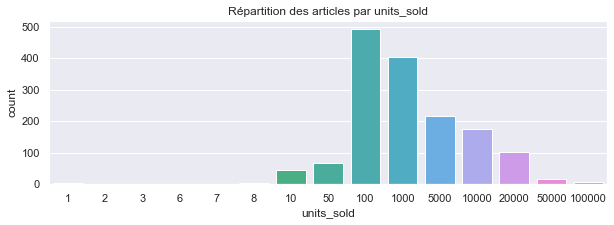

In [15]:
# Repartition des articles par "units sold"

fig, ax = plt.subplots(figsize=(10,3))
sns.countplot(x='units_sold',data=df)
plt.title('Répartition des articles par units_sold')
plt.show()
# La plupart des articles est catégorisée dans les unités vendues entre 100 et 20 000.


✔ **Focus sur la colonne 'origin_country'**

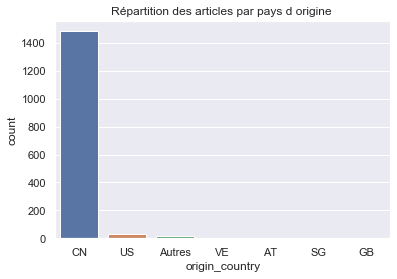

In [16]:
#Pays d'origine des produits
sns.countplot("origin_country",data=df)
plt.title('Répartition des articles par pays d origine ')
plt.show()

# Ce graphique nous montre que la quasi totalité des produits sont originaires de Chine chez Wish.


**⇨ Ce graphique nous montre que la quasi totalité des produits sont originaires de Chine chez Wish.** 
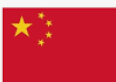

✔ **Focus sur la colonne 'product_color'**

black     0.193632
white     0.159844
yellow    0.065627
pink      0.063028
blue      0.062378
red       0.059779
green     0.055880
grey      0.045484
purple    0.034438
Autres    0.026641
Name: product_color, dtype: float64


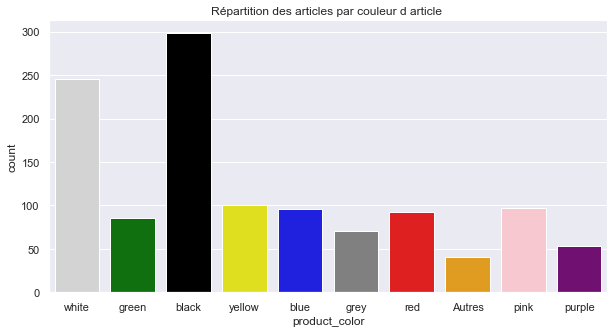

In [17]:
# Couleurs les plus vendues

print(df["product_color"].value_counts(normalize = True).head(10))
color = ["black", "white", "yellow", "blue", "pink", "red", "green", "grey", "purple", "Autres"]
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot("product_color", data=df[df.product_color.isin(color)],
              palette=["lightgrey", "green", "black", "yellow", "blue", "grey", "red","orange", "pink", "purple"],
              ax=ax);
plt.title('Répartition des articles par couleur d article ')
plt.show()


La majorité des produits est vendue en 9 couleurs principalement, 
les couleurs dominantes sont le noir et le blanc.

✔ **Focus sur la colonne 'Price'**

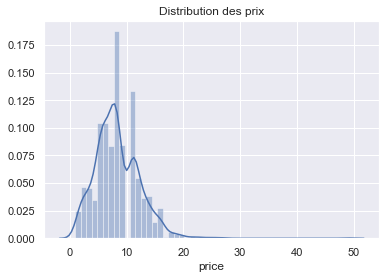

In [18]:
# Distribution des prix

sns.distplot(df['price']);
plt.title("Distribution des prix")
plt.show()
# la variable 'price' a une distribution normale.
# La majorité des valeurs sont au tour de 10.  
# Ils existe des outliers à partir de 20 qui pourraient influencer la moyenne des prix

# RELATION ENTRE DEUX VARIABLES

 ✅  **Relation entre 'prix' et 'unit sold'**

Text(0.5, 1, 'Relation entre prix et unit sold')

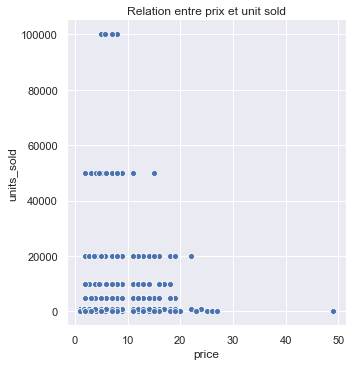

In [19]:
# Relation entre prix et unit sold

sns.relplot(x='price',y='units_sold',data=df)
plt.title("Relation entre prix et unit sold")
#Nous remarquons que les produits les plus vendus ont des prix<10.
#Et tous produits dont le prix>10 ont à peux près le même nombre de ventes.
# Ainsi,on pourrait se demander s'il existe une correlation linéaire entre ces deux variables?


✔ **Vérification par le coefficient de corrélation de Pearson**

In [20]:
from scipy.stats import pearsonr

pd.DataFrame(pearsonr(df['units_sold'],df['price']),index=['pearson_coeff','p-value'],
             columns=['resultat_test'])
  #Le test nous renvoi une p-value<5%. Donc il accepte l'independance de ces deux variables.
  #Ainsi, l'hypthèse de non correlation linéaire évoquée par la courbe ci-dessus est confirmée..

,resultat_test
pearson_coeff,-0.029633
p-value,0.245315


 ✅ **Relation entre 'prix' et 'note'**

Text(0.5, 1, 'Relation entre prix et note')

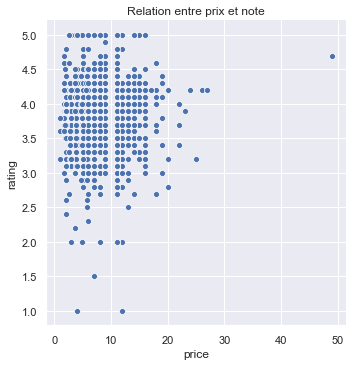

In [21]:
# Relation entre le prix et la note
#Affichons une courbe de relation entre les variables 'price' et 'rating'
sns.relplot(x='price', y='rating',data=df)
plt.title("Relation entre prix et note")
#La courbe nous montre une faible correlation entre ces deux variables.

✔ **Vérification par le coefficient de corrélation de Pearson**

In [22]:
pd.DataFrame(pearsonr(df['price'],df['rating']), index=['pearson_ceff','p-value'],
             columns=['resultat_test'])
#Le test nous confirme qu'il y a une faible corrélation entre les deux variables.


,resultat_test
pearson_ceff,0.055746
p-value,0.028753


 ✅  **Repartition des articles par 'unit sold' selon l'existence d'une publicité**

Text(0.5, 1.0, "Repartition des articles par unit sold selon l'existence d'une publicité")

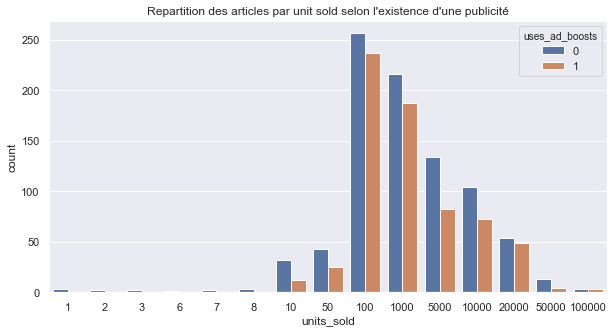

In [23]:
# Repartition des articles par unit sold selon l'existence d'une publicité
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot("units_sold", data=df,hue=df.uses_ad_boosts)
plt.title("Repartition des articles par unit sold selon l'existence d'une publicité")

#L'existance d'une publicité sur un produit ne semble pas avoir d'impact sur la quantité vendue
#En effet nous voyons à travers ce graphique que le nombre d'articles répartis dans les units solds est bien
#bien supérieur dans la catégorie sans pub vs avec pub

 ✅ **Relation entre 'prix' et 'units_sold'**

Text(0.5, 1, 'Relation entre prix et units sold')

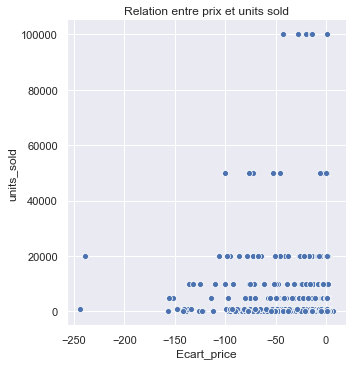

In [24]:
# Price vs retail price
df['Ecart_price'] = df.price-df.retail_price
# Relation entre le prix et le retail price
#Affichons une courbe de relation entre les variables 'price' et 'rating'
sns.relplot(x='Ecart_price', y='units_sold',data=df)
plt.title("Relation entre prix et units sold")
#La courbe nous montre une faible correlation entre ces deux variables.

*   **La courbe montre une très faible dependance. Ce qui est normale parcequ'on a vu plus haut que les variables 'Price' et 'units_sold' sont independantes**. 

# 🔶🔶 Correlation entre toutes les variables  🔶🔶


**Finissons cette exploration par l'étude de la correlation entre toutes les variables de df**

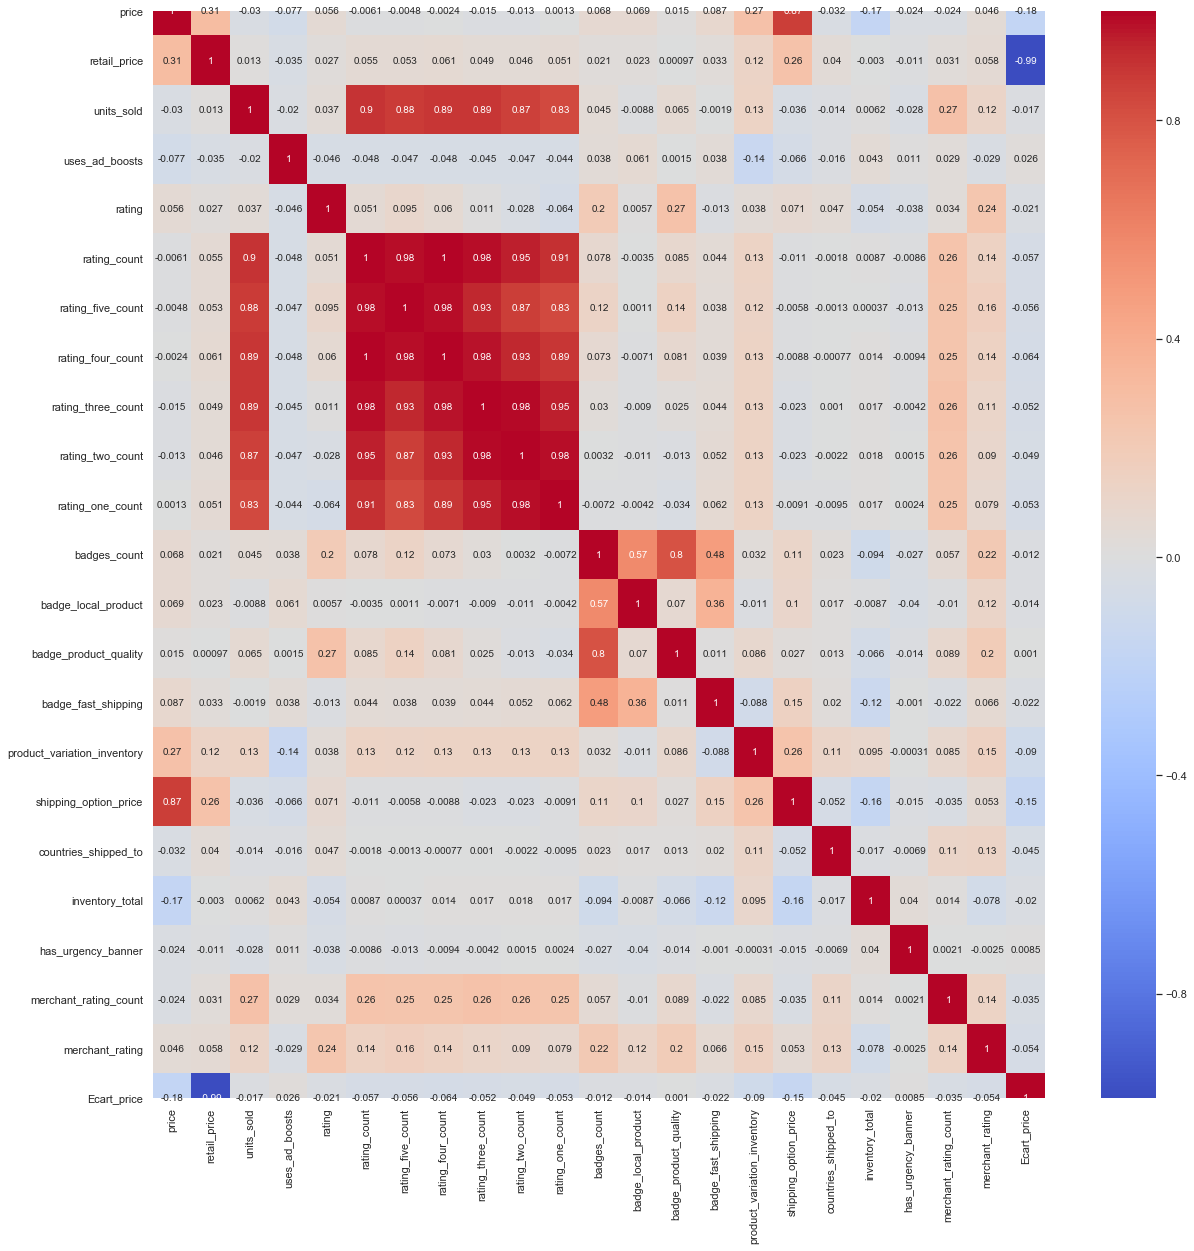

In [25]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')

🔴   **Conclusion de la partie 1 :**

**Exploration, préparation et datavisualisation du dataset**

Cette première étape nous montre peu de corrélation entre les variables.
Nous remarquons une forte correlation entre la variable **'units_sold'** et les variables **'rating_count'**,**'rating_five_count'**, **'rating_four_count'**, **'rating_three_count'**, **'rating_two_count'**, **'rating_one_count'**.


C'est ce que nous attendons, parcque les articles sont notés après leur achat.
Nous remarquons aussi que la variable **'price'** est fortement correlée avec la variable **'shipping_option_price'**, ce qui est tout à fait normale.
Cependant il n'y a pas de correlation entre la variable **'units_sold'** et **'rating'** ce qui suppose que la vente d'un article, ne depend pas de sa côte ?

# Algorithme de machine learning #

# Apprentissage supervisé¶

# REGRESSION LINEAIRE

In [26]:
#Certaines colonnes ne vont pas être utiles pour faire des modèles de régression.
df=df.drop(["shipping_option_name","urgency_text","title_orig","currency_buyer","origin_country","product_color","product_variation_size_id","Ecart_price"],axis=1)
df.info()
#Nous allons travailler avec 23 variables 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1539 entries, 0 to 1572
Data columns (total 22 columns):
price                          1539 non-null float64
retail_price                   1539 non-null int64
units_sold                     1539 non-null int64
uses_ad_boosts                 1539 non-null int64
rating                         1539 non-null float64
rating_count                   1539 non-null int64
rating_five_count              1539 non-null float64
rating_four_count              1539 non-null float64
rating_three_count             1539 non-null float64
rating_two_count               1539 non-null float64
rating_one_count               1539 non-null float64
badges_count                   1539 non-null int64
badge_local_product            1539 non-null int64
badge_product_quality          1539 non-null int64
badge_fast_shipping            1539 non-null int64
product_variation_inventory    1539 non-null int64
shipping_option_price          1539 non-null int64
countries_sh

In [27]:
#Supprimons les lignes pour les quelles la variable 'units_sold>5000'
df = df.loc[df['units_sold']>=5000]
df.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating
1,8.00,22,20000,1,3.5,6135,2269.0,1027.0,1118.0,644.0,...,0,0,0,50,2,41,50,1.0,17752,3.899673
3,8.00,8,5000,1,4.0,579,295.0,119.0,87.0,42.0,...,0,0,0,50,2,41,50,0.0,23832,4.020435
6,7.00,6,50000,0,3.8,6742,3172.0,1352.0,971.0,490.0,...,0,0,0,50,2,31,50,0.0,10194,4.076516
9,5.78,22,5000,0,3.6,687,287.0,128.0,92.0,68.0,...,0,0,0,50,2,33,50,0.0,5534,3.999819
14,2.00,2,20000,1,3.6,2457,984.0,481.0,459.0,206.0,...,0,0,0,1,1,36,50,0.0,55499,4.138885


In [28]:
# Création de la variable cible
target = df['units_sold']

# Création des variables explicatives
data = df.drop('units_sold',axis=1)

**Normalisons les données**

In [29]:
##Normalisons les données
scaler = preprocessing.StandardScaler().fit(data)

data[data.columns] = pd.DataFrame(scaler.transform(data), index= data.index)
data.head()

,price,retail_price,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,...,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating
1,-0.116335,-0.004564,1.211060,-1.142884,1.283315,0.770991,0.946915,1.662090,2.118952,2.646619,...,-0.140303,-0.351631,-0.076323,0.610873,-0.421292,0.073009,0.04398,1.581139,-0.246355,-1.258627
3,-0.116335,-0.451852,1.211060,0.453701,-0.648810,-0.629398,-0.626112,-0.600188,-0.573380,-0.690356,...,-0.140303,-0.351631,-0.076323,0.610873,-0.421292,0.073009,0.04398,-0.632456,-0.198615,-0.432928
6,-0.421796,-0.515750,-0.825723,-0.184933,1.494402,1.411595,1.509948,1.339534,1.430216,1.620844,...,-0.140303,-0.351631,-0.076323,0.610873,-0.421292,-0.508814,0.04398,-0.632456,-0.305699,-0.049479
9,-0.794458,-0.004564,-0.825723,-0.823567,-0.611253,-0.635074,-0.610520,-0.589217,-0.457100,-0.446735,...,-0.140303,-0.351631,-0.076323,0.610873,-0.421292,-0.392449,0.04398,-0.632456,-0.342288,-0.573885
14,-1.949101,-0.643547,1.211060,-0.823567,0.004273,-0.140610,0.001020,0.216075,0.160079,0.242458,...,-0.140303,-0.351631,-0.076323,-2.039586,-1.540417,-0.217903,0.04398,-0.632456,0.050029,0.376971


**Partagons aleatoirement nos données en ensemble d'entrainement et de test**

In [30]:
#Partagons aleatoirement nos données en ensemble d'entrainement et de test

X_train,X_test,y_train,y_test = train_test_split(data, target, test_size=0.2, random_state=789)


In [31]:
# Intensions un modèle de regression linéaire et ajustons-le aux données d'entrainement
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
#Affichons l'intercept, et les coefficients estimées de chaque variable
coefs = list(lr.coef_)
coefs.insert(0, lr.intercept_)

feats = list(data.columns)
feats.insert(0,'intercept')

pd.DataFrame({'valeur estimée':coefs}, index=feats)


,valeur estimée
intercept,12312.000167
price,-198.564504
retail_price,-156.462226
uses_ad_boosts,545.914057
rating,158.419302
rating_count,3116.836371
rating_five_count,5041.137442
rating_four_count,-9031.870252
rating_three_count,17845.840495
rating_two_count,-5174.304542


**Score du modele REGRESSION LINEAIRE**

In [33]:
# Affichons le score du modele et le coefficient obtenue par validation croisée
print("Le coefficient de determination:",lr.score(X_train,y_train))
print("Le score du model sur l'ensemble test:", lr.score(X_test,y_test))

#Le score obtenue sur l'echantillon d'apprentissage est correct, mais le score obtenue sur le test montre qu'il y a peut être un surapprentissage du modele.
#Essayons d'ameliorer le model en choisissant les variables explicatives les plus significatifs possible .

Le coefficient de determination: 0.7842848623295198
Le score du model sur l'ensemble test: 0.36732558470909993


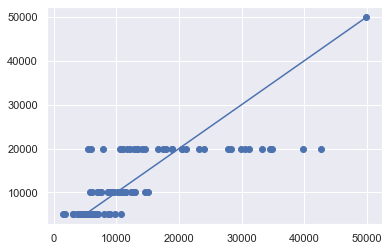

In [34]:
#prédiction du modèle

pred_lrtest = lr.predict(X_test)
plt.scatter(pred_lrtest, y_test)
plt.plot((y_test.min(),y_test.max()), (y_test.min(),y_test.max()))
plt.show()



In [35]:
# Selection des variables les plus correlées a 'units_sold'
s_feats = ['rating_count','rating_one_count','rating_two_count','rating_three_count','rating_four_count','rating_five_count']

#Créeons un nouveau modele et ajustons le avec les variable s_feats de X_train
lr2 = LinearRegression()
lr2.fit(X_train[s_feats], y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Score du modele REGRESSION LINEAIRE avec les variables les plus correlées a 'units_sold**

In [36]:
# Affichons le score du modele

print("Le score du modele sur l'echantillon d'entrainement:", lr2.score(X_train[s_feats], y_train))
print("Le score du modele sur l'echantillon test:", lr2.score(X_test[s_feats],y_test))

#Le modèle présente presque les mêmes résultats que le précédent.

Le score du modele sur l'echantillon d'entrainement: 0.7681049374401646
Le score du modele sur l'echantillon test: 0.40798680532928244


In [37]:
#affichons a present les resultats de notre prediction

moy = scaler.mean_[-1]
ec = scaler.scale_[-1]
print("moyenne :", moy)
print("ecart-type", ec)

pd.DataFrame({'ventes_observées': (y_test*ec)+moy, 'ventes_predites' : (pred_lrtest*ec)+moy}, index = X_test.index).head(7)

# Le modèle de prédiction semble proche de la réalité

moyenne : 4.083752028080814
ecart-type 0.14625358108976505


,ventes_observées,ventes_predites
227,735.351657,751.110338
741,1466.619563,1613.818912
280,735.351657,950.251152
1008,735.351657,803.340808
378,735.351657,460.655258
548,2929.155374,2445.165543
271,2929.155374,1785.640233


# REGRESSION LASSO

In [38]:
# Intensions un modèle de Lasso et ajustons-le aux données d'entrainement
lasso_r = Lasso(alpha=1)

lasso_r.fit(X_train, y_train)

print("Lasso_coef",lasso_r.coef_)

Lasso_coef [  -207.51512316   -158.54823346    547.42143473    153.58143563
   9968.1225089    1586.39998834 -10045.19315755  16178.84088554
  -5284.90371456   -546.05721737     -0.            298.66966909
   -128.91262922  -1281.54797804    -88.40409218   -238.93996675
   -629.66975307   -170.58614117   -378.18415103    509.08037878
   -144.10207066]


C:\Users\Jalloh\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1267691226.8773098, tolerance: 8323019.323671498
  positive)


In [39]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)

lasso_reg.fit(X_train, y_train)
print("Lasso_coef",lasso_reg.coef_)

Lasso_coef [-2.01289077e+02 -1.57076315e+02  5.46535832e+02  1.57383468e+02
  1.10483667e+04  1.12709074e+03 -1.05215720e+04  1.64209955e+04
 -5.66775412e+03 -5.89901087e+02 -1.45244265e+02  3.52267911e+02
 -7.76759214e+00 -1.25058391e+03 -8.91052875e+01 -2.41970790e+02
 -6.33595482e+02 -1.68650539e+02 -3.77334147e+02  5.09020714e+02
 -1.42251364e+02]


C:\Users\Jalloh\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5198705512.83182, tolerance: 8323019.323671498
  positive)


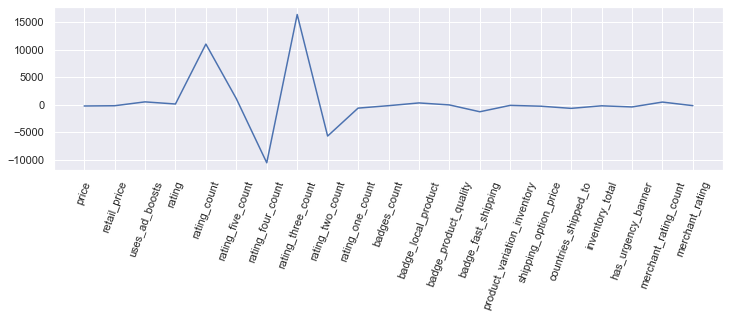

In [40]:
#graphique représentant la valeur estimée du coefficient pour chaque variable"

lasso_coef = lasso_reg.coef_

plt.figure(figsize=(12,3))
plt.plot(range(len(data.columns)), lasso_coef)
plt.xticks(range(len(data.columns)), data.columns.values, rotation=70)
plt.show()
##Seulement deux variables ont été retenus

**Score du modele LASSO**

In [41]:
#Affichons le score du modele

print("Le score du modele sur l'echantillon d'entrainement:", lasso_reg.score(X_train, y_train))
print("Le score du modele sur l'echantillon test:", lasso_reg.score(X_test,y_test))

#Surapprentissage apparent

Le score du modele sur l'echantillon d'entrainement: 0.7842841761855247
Le score du modele sur l'echantillon test: 0.3680591015058724


In [42]:
#Prédiction aux valeurs ajustées
lasso_pred_train = lasso_reg.predict(X_train)
lasso_pred_test = lasso_reg.predict(X_test)

print("mse train:", mean_squared_error(lasso_pred_train, y_train))
print("mse test:", mean_squared_error(lasso_pred_test, y_test))

##Les résultats ne semblent pas mieux que la Régression Linéaire

mse train: 43367318.11665688
mse test: 34045114.78851037


In [43]:
#Utilisons le LassoPath 

from sklearn.linear_model import lasso_path

mes_alphas = (0.001,0.01,0.02,0.025,0.05,0.1,0.25,0.5,0.8,1.0)

alpha_path, coefs_lasso, _ = lasso_path(X_train, y_train, alphas=mes_alphas)

coefs_lasso.shape


C:\Users\Jalloh\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2253828392.4304047, tolerance: 14655000.0
  tol, rng, random, positive)
C:\Users\Jalloh\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1923797965.7993088, tolerance: 14655000.0
  tol, rng, random, positive)
C:\Users\Jalloh\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1915274490.2127838, tolerance: 14655000.0
  tol, rng, random, positive)
C:\Users\Jalloh\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase

(21, 10)

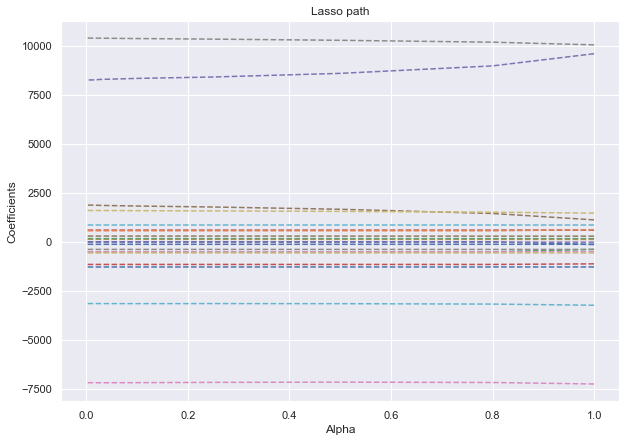

In [44]:
import matplotlib.cm as cm

plt.figure(figsize=(10,7))

for i in range(coefs_lasso.shape[0]):
    plt.plot(alpha_path, coefs_lasso[i,:], '--')

plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso path')
plt.show()


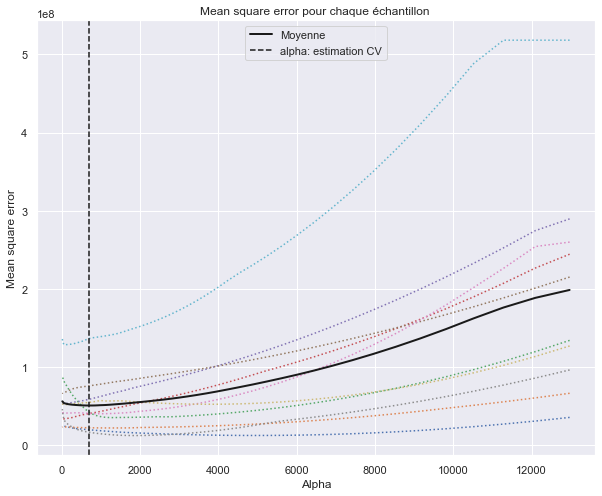

In [45]:
from sklearn.linear_model import LassoCV

model_lasso = LassoCV(cv=10).fit(X_train, y_train)

alphas = model_lasso.alphas_

plt.figure(figsize = (10,8))

plt.plot(alphas, model_lasso.mse_path_, ':')

plt.plot(alphas, model_lasso.mse_path_.mean(axis=1), 'k',
         label='Moyenne', linewidth=2)

plt.axvline(model_lasso.alpha_, linestyle='--', color='k',
            label='alpha: estimation CV')

plt.legend()

plt.xlabel('Alpha')
plt.ylabel('Mean square error')
plt.title('Mean square error pour chaque échantillon ')
plt.show()

In [46]:

pred_lassotest = model_lasso.predict(X_test)

print("score test:", model_lasso.score(X_test, y_test))
print("mse test:", mean_squared_error(pred_lassotest, y_test))

##Les résultats sont mieux sur l'échantillon de test

score test: 0.4516605896248449
mse test: 29541177.36923103


In [47]:
moy = scaler.mean_[-1]
ec = scaler.scale_[-1]
print("moyenne :", moy)
print("ecart-type", ec)

pd.DataFrame({'ventes_observées': (y_test*ec)+moy, 'ventes_predites' : (pred_lassotest*ec)+moy}, index = X_test.index).head(7)

moyenne : 4.083752028080814
ecart-type 0.14625358108976505


,ventes_observées,ventes_predites
227,735.351657,795.555854
741,1466.619563,1594.905281
280,735.351657,913.562161
1008,735.351657,977.656332
378,735.351657,693.013837
548,2929.155374,2549.976537
271,2929.155374,1727.718775


# ELASTIC NET

In [48]:
# Intensions un dernier modèle d'ElasticNet et ajustons-le aux données d'entrainement
from sklearn.linear_model import ElasticNetCV

model_en = ElasticNetCV(cv=8, l1_ratio = (0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.99), 
                        alphas= (0.001,0.01,0.02,0.025,0.05,0.1,0.25,0.5,0.8,1.0))
model_en.fit(X_train, y_train)
#model= LassoCV(cv=10).fit(X_train, y_train)

C:\Users\Jalloh\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8430860154.2464905, tolerance: 7980808.011049724
  tol, rng, random, positive)
C:\Users\Jalloh\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7843158827.647129, tolerance: 7955559.392265195
  tol, rng, random, positive)
C:\Users\Jalloh\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8241716938.481028, tolerance: 6986933.701657459
  tol, rng, random, positive)
C:\Users\Jalloh\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You mig

ElasticNetCV(alphas=(0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0),
             copy_X=True, cv=8, eps=0.001, fit_intercept=True,
             l1_ratio=(0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.99),
             max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=None,
             selection='cyclic', tol=0.0001, verbose=0)

In [49]:
coeffs = list(model_en.coef_)
coeffs.insert(0, model_en.intercept_)
feats = list(data.columns)
feats.insert(0, 'intercept')

pd.DataFrame({'valeur estimée': coeffs}, index = feats)



,valeur estimée
intercept,12287.913430
price,-333.887361
retail_price,-217.843440
uses_ad_boosts,382.245286
rating,267.464603
rating_count,2054.306698
rating_five_count,2082.250337
rating_four_count,1958.769650
rating_three_count,2180.089282
rating_two_count,1839.458004


**Score du modele ELASTIC NET**

In [50]:
#Affichons le score du modele

print("Le score du modele sur l'echantillon d'entrainement:", model_en.score(X_train, y_train))
print("Le score du modele sur l'echantillon test:", model_en.score(X_test,y_test))

Le score du modele sur l'echantillon d'entrainement: 0.771420941124641
Le score du modele sur l'echantillon test: 0.44532368102358033


In [51]:
#Prédiction aux valeurs ajustées
pred_entrain = model_en.predict(X_train)
pred_entest = model_en.predict(X_test)

print("rmse train:", np.sqrt(mean_squared_error(y_train, pred_entrain)))
print('rmse test:', np.sqrt(mean_squared_error(y_test, pred_entest)))

##Les résultats ne semblent pas mieux que la Régression Linéaire

rmse train: 6778.888662438388
rmse test: 5466.495338837334


In [52]:
moy = scaler.mean_[-1]
ec = scaler.scale_[-1]
print("moyenne :", moy)
print("ecart-type", ec)

pd.DataFrame({'ventes_obsérvés': (y_test*ec)+moy, 'ventes_predits' : (pred_entest*ec)+moy}, index = X_test.index).head(7)

moyenne : 4.083752028080814
ecart-type 0.14625358108976505


,ventes_obsérvés,ventes_predits
227,735.351657,790.575597
741,1466.619563,1645.140388
280,735.351657,1020.964470
1008,735.351657,852.477500
378,735.351657,461.515699
548,2929.155374,2407.625234
271,2929.155374,1619.987564


* Ces trois régressions sont toutes presque parfaites en terme de score mais ce n'est pas pour cela qu'elles 
sont les modèles les plus adequates.
* Tout depend de la problematique et de l'enjeu du projet.
* Dans notre cas (purement pedagogique) l'enjeu consiste à mettre en pratique les modèles, 
les tester,les comparer,et surtout comprendre quel type de modèle choisir en fonction de notre problematique et des données.

 ❌  ❌  ❌  ❌  ❌  ❌  ❌  ❌  ❌  ❌  ❌  ❌  ❌  ❌  ❌  ❌  ❌  ❌  ❌  ❌  ❌  ❌  ❌  ❌  ❌  ❌  ❌  ❌ ❌  ❌  ❌  ❌  ❌  ❌ 

# MACHINE LEARNING


# CLASSIFICATION

#### Algorithme de machine learning #####

❗  Nous avons constatés que la variable **'Units sold'** correspond a une classification de quantités d'unitées vendues. 

C'est donc une variable cathégorielle. Nous utiliserons alors des méthodes de classifications pour mieux prédire notre variable cible.C'est pourquoi nous utiliserons les méthode de **classifications** de machine learning pour mieux prédire notre variable cible.


Nous construirons dans un premeir temps un Arbres de décision pour connaitre l'importance des variables.

Puis nous allons comparer plusieurs méthodes d'apprentissages en terme de score et d'interpretabilités. 



In [53]:
from sklearn import model_selection
from sklearn import ensemble
from sklearn import linear_model
from sklearn import svm
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier



🟢 **Inverser la normalisation des données => ramener les données à l'origine**

In [54]:
df2 = pd.read_csv('data_wish.csv').reset_index()
#Préparation des colonnes pertinentes à garder
df2=df2.drop(["index","title","tags","shipping_is_express","merchant_name","merchant_info_subtitle","merchant_id","merchant_has_profile_picture","merchant_profile_picture","product_url","product_id","theme","crawl_month","merchant_title","product_picture"],axis=1)
#Remplacer les valeurs manquantes
df2["product_color"] = df2["product_color"].fillna("Autres")
df2["has_urgency_banner"] = df2["has_urgency_banner"].fillna(0)
df2["urgency_text"] = df2["urgency_text"].fillna("Non")
df2["origin_country"] = df2["origin_country"].fillna("Autres")
df2["rating_five_count"] = df2["rating_five_count"].fillna(0)
df2["rating_four_count"] = df2["rating_four_count"].fillna(0)
df2["rating_three_count"] =df2["rating_three_count"].fillna(0) 
df2["rating_two_count"] =df2["rating_two_count"].fillna(0)
df2["rating_one_count"] =df2["rating_one_count"].fillna(0)
df2["product_variation_size_id"] =df2["product_variation_size_id"].fillna(0)
# Exploration de la colonne 'Rating' qui est l'Évaluation des articles par  les consommateurs et arrondi.
df2['rating']=df2['rating'].apply(lambda x: round(x,1))
df2=df2.drop(["shipping_option_name","urgency_text","title_orig","currency_buyer","origin_country","product_color","product_variation_size_id"],axis=1)

In [55]:
# Choigissons les lignes de df2 pour les quelles df['units_sold']>=5000
df2 = df2.loc[df2['units_sold']>=5000]
df2.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating
1,8.00,22,20000,1,3.5,6135,2269.0,1027.0,1118.0,644.0,...,0,0,0,50,2,41,50,1.0,17752,3.899673
3,8.00,8,5000,1,4.0,579,295.0,119.0,87.0,42.0,...,0,0,0,50,2,41,50,0.0,23832,4.020435
6,7.00,6,50000,0,3.8,6742,3172.0,1352.0,971.0,490.0,...,0,0,0,50,2,31,50,0.0,10194,4.076516
9,5.78,22,5000,0,3.6,687,287.0,128.0,92.0,68.0,...,0,0,0,50,2,33,50,0.0,5534,3.999819
14,2.00,2,20000,1,3.6,2457,984.0,481.0,459.0,206.0,...,0,0,0,1,1,36,50,0.0,55499,4.138885


🟢 **Séparons les variables target et features**

In [56]:
target2 = df2['units_sold']
data2 = df2.drop('units_sold',axis=1)

In [57]:
# Séparons les variables target et features
target2 = df2['units_sold']

data2 = df2.drop('units_sold',axis=1)

#Partagons aleatoirement nos données en ensemble d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(data2, target2, test_size = 0.2)

#Centrer et réduire les variables explicatives des deux échantillons de manière adéquate.
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


🟢 **Normalisons les données**

In [58]:
scaler = preprocessing.StandardScaler().fit(data2)

data2[data2.columns] = pd.DataFrame(scaler.transform(data2), index= data2.index)
data2

,price,retail_price,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,...,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating
1,-0.120991,-0.003200,1.205334,-1.146566,1.287019,0.773862,0.950045,1.666317,2.123904,2.652299,...,-0.140028,-0.350871,-0.076176,0.612158,-0.422367,0.072186,0.043895,1.577952,-0.246601,-1.256536
3,-0.120991,-0.451241,1.205334,0.451864,-0.647893,-0.628651,-0.625284,-0.599247,-0.572154,-0.689225,...,-0.140028,-0.350871,-0.076176,0.612158,-0.422367,0.072186,0.043895,-0.633733,-0.198778,-0.430272
6,-0.425991,-0.515247,-0.829646,-0.187508,1.498411,1.415437,1.513902,1.343293,1.434214,1.625125,...,-0.140028,-0.350871,-0.076176,0.612158,-0.422367,-0.510685,0.043895,-0.633733,-0.306050,-0.046560
9,-0.798091,-0.003200,-0.829646,-0.826880,-0.610281,-0.634335,-0.609669,-0.588260,-0.455713,-0.445271,...,-0.140028,-0.350871,-0.076176,0.612158,-0.422367,-0.394111,0.043895,-0.633733,-0.342704,-0.571325
14,-1.950990,-0.643258,1.205334,-0.826880,0.006133,-0.139121,0.002766,0.218202,0.162320,0.244861,...,-0.140028,-0.350871,-0.076176,-2.032430,-1.542931,-0.219249,0.043895,-0.633733,0.050304,0.380182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557,0.184009,1.724956,-0.829646,-1.146566,1.618907,1.033902,1.586769,2.099213,2.441877,2.498223,...,-0.140028,-0.350871,-0.076176,0.612158,0.698198,-0.219249,0.043895,-0.633733,0.017819,-0.787197
1558,1.404008,-0.355232,-0.829646,0.771550,0.160758,0.279359,0.219634,0.086355,-0.155654,-0.201317,...,-0.140028,-0.350871,-0.076176,0.612158,0.698198,-0.219249,0.043895,1.577952,-0.272165,0.441462
1560,-0.425991,0.092808,-0.829646,-1.146566,-0.579983,-0.654939,-0.526392,-0.467400,-0.397493,-0.445271,...,-0.140028,-0.350871,-0.076176,-1.978458,-0.422367,-0.743834,0.043895,-0.633733,-0.294362,0.749715
1567,-0.120991,-0.483244,1.205334,1.091236,0.239464,0.525189,0.174525,-0.122402,-0.187003,-0.175638,...,-0.140028,2.850054,-0.076176,0.612158,-0.422367,0.247048,0.043895,-0.633733,-0.254066,0.490658


🟢 **Partagons aleatoirement nos données en ensemble d'entrainement et de test**

In [59]:
X_train, X_test, y_train, y_test = train_test_split(data2, target2, test_size = 0.2)

🟢 **Centrer et réduire les variables explicatives des deux échantillons de manière adéquate**

In [60]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🟣 ARBRE DE DECISION

In [61]:
# Instancions un classificateur 'Arbre de decision'
dt =  DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=321)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=321, splitter='best')

In [62]:
y_pred = dt.predict(X_test_scaled)

pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])


Classe prédite,5000,10000,20000,50000,100000
Classe réelle,,,,,
5000,37,13,0,0,0
10000,4,20,3,0,0
20000,1,3,15,0,0
50000,0,0,6,1,1


🟣 **Affichons les 6 variables les plus importantes, ainsi que leurs importances respectives**

In [63]:
# Affichons les 6 variables les plus importantes, ainsi que leurs importances respectives

feats ={}
for feature, importance in zip(data2.columns, dt.feature_importances_):
    feats[feature]= importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0:'Importance'})
importances.sort_values(by='Importance',ascending=False).head(6)

,Importance
rating_count,0.726340
rating_two_count,0.104729
product_variation_inventory,0.034916
rating_one_count,0.029587
rating_five_count,0.028665
price,0.018712


*   Ces variables sont les plus correlées avec la variable cible.

🟣 **Score du modèle Arbre de décision**

In [64]:
dt.score(X_test, y_test)


0.7019230769230769

# 🟡 KNN

In [65]:
# Création du classificateur et construction du modèle sur les données d'entraînement
knn = neighbors.KNeighborsClassifier(n_neighbors=8, metric='minkowski')
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

🟡 **Construction du modèle sur les données d'entraînement KNN**

In [66]:
y_pred = knn.predict(X_test_scaled)
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,5000,10000,20000,100000
Classe réelle,,,,
5000,39,11,0,0
10000,10,17,0,0
20000,2,9,8,0
50000,0,1,6,1


🟡 **Score du modèle KNN**

In [67]:
#Score du modèle utilisant la distance de minkowski
score_minkowski = knn.score(X_test, y_test)

#Score du modèle utilisant la distance de manhattan
score_manhattan = knn.score(X_test, y_test)

score_minkowski, score_manhattan

(0.625, 0.625)

# 🟠 SVM

🟠 **Entrainement du modèle**

In [68]:
clf = svm.SVC()

parametres = {'C':[0.1,1,10],'kernel':['rbf','linear', 'poly'], 'gamma':[0.001, 0.1, 0.5]}
grid_clf = model_selection.GridSearchCV(estimator =clf,param_grid=parametres)

grille = grid_clf.fit(X_train_scaled,y_train)

print(pd.DataFrame.from_dict(grille.cv_results_).loc[:,["params","mean_test_score"]]) 


C:\Users\Jalloh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


                                            params  mean_test_score
0      {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}         0.401442
1   {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}         0.757212
2     {'C': 0.1, 'gamma': 0.001, 'kernel': 'poly'}         0.401442
3        {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}         0.401442
4     {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}         0.757212
5       {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}         0.516827
6        {'C': 0.1, 'gamma': 0.5, 'kernel': 'rbf'}         0.401442
7     {'C': 0.1, 'gamma': 0.5, 'kernel': 'linear'}         0.757212
8       {'C': 0.1, 'gamma': 0.5, 'kernel': 'poly'}         0.627404
9        {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}         0.432692
10    {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}         0.745192
11      {'C': 1, 'gamma': 0.001, 'kernel': 'poly'}         0.401442
12         {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}         0.656250
13      {'C': 1, 'gamma': 0.1, 'kernel': 'linear

Meilleur score : {'C': 10, 'gamma': 0.001, 'kernel': 'linear'} 

In [69]:
y_pred = grid_clf.predict(X_test_scaled)

In [70]:
pd.crosstab(y_test, y_pred, rownames=["Classe réelle"], colnames = ["Classe prédite"])

Classe prédite,5000,10000,20000,50000,100000
Classe réelle,,,,,
5000,39,11,0,0,0
10000,7,19,1,0,0
20000,1,5,13,0,0
50000,0,0,6,1,1


🟠 **Score du modèle SVM**

In [71]:
grid_clf.score(X_test, y_test)

0.6923076923076923

# 🔵 REGRESSION LOGISTIQUE

In [72]:
lgr = linear_model.LogisticRegression(C=1.0)
lgr.fit(X_train_scaled,y_train)

C:\Users\Jalloh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Jalloh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
y_pred = lgr.predict(X_test_scaled)

🔵 **Matrice de confusion de REGRESSION LOGISTIQUE**

In [74]:
pd.crosstab(y_test, y_pred, rownames=['classe reelle'], colnames=['classe predite'])

classe predite,5000,10000,20000
classe reelle,,,
5000,42,8,0
10000,8,17,2
20000,1,9,9
50000,0,1,7


🔵 **Score du modèle de REGRESSION LOGISTIQUE**

In [75]:
lgr.score(X_test, y_test)

0.6538461538461539

# 🟢 RANDOM FOREST

In [76]:
rf = ensemble.RandomForestClassifier(n_jobs = -1, random_state = 321)
rf.fit(X_train_scaled, y_train) 
y_pred = rf.predict(X_test_scaled)
a= np.arange(2,31,2)

parametres= [{'n_estimators': [10, 50, 100, 150, 200, 250],
                   'min_samples_leaf': ['a'], 
                   'max_features': ['sqrt', 'log2']}]


grid_rf = model_selection.GridSearchCV(estimator=rf.fit, param_grid=parametres)
grille = rf.fit(X_train_scaled,y_train)



C:\Users\Jalloh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


🟢 **Matrice de confusion RANDOM FOREST** 

In [77]:
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,5000,10000,20000,50000
Classe réelle,,,,
5000,41,9,0,0
10000,4,21,2,0
20000,1,3,15,0
50000,0,0,7,1


🟢 **Score du modèle de RANDOM FOREST**

In [78]:
rf.score(X_test, y_test)

0.75

Le modèle de **Random Forest** semble être le meilleur classificateur parmi les modèles testés!


  #  🟤 Conclusion des Apprentissages supervisés

**La méthode de regression :**

Notre objectif était de déterminer le prévisionnelle des ventes.
Donc, afin de prédire une variable quantitative à partir de variables explicatives, 
« la régression » a été retenue dans un premier temps comme type de modèle de machine Learning. 
La grande quantité de variable numérique nous a conforté dans notre choix.

La variable **‘Units_sold’** correspondant aux nombres d’unités vendus par produits a été retenue comme variable cible.

Nous avons remarqué très rapidement notre erreur en utilisant la méthode de régression.

1-	La grande quantité de variable numérique nous a induits en erreur.
**Nous en avons retenu :**

Même si le nombre de variable numérique est important, les corrélations avec la variable cible reste primordiale.

2-	Peu de corrélation entre les variables.
En utilisant la méthode df.corr(), Nous remarquons que peu de varaible sont corrélées à notre donnée cible : 
    'units_sold' seules les variables 'rating_count','rating_five_count', 'rating_four_count', 'rating_three_count', 
    'rating_two_count', 'rating_one_count' le sont ce qui n’est pas représentatif.
Nous remarquons aussi que la variable 'price' est fortement correlée avec la variable 'shipping_option_price',
ce qui est tout à fait normale

 **Nous en avons retenu :**
        Les methodes de machines learning sont de bon moyen de vérification

Tous ces éléments nous démontrent que la méthode de régression ne convient pas pour  prédire les futures ventes.

Après analyse des differentes visualisations de notre variable cible ‘units sold’,
Nous avons constatés que la variable 'Units sold' correspond a une classification de quantités d'unités vendues.
C'est pourquoi nous avons dans un second temps essayer des méthodes de classifications de machine learning.




**Les méthodes de Classification :**

Nous nous sommes donc concentrés dans un deuxième temps sur les méthodes de classifications.
Pour savoir lequel choisir, nous en avons tout simplement tous testés plusieurs.
Nous devions évaluer un modèle d'apprentissage supervisé afin de choisir le bon modèle pour prédire au mieux nos données.

Nous allons comparer plusieurs méthodes d'apprentissages : 
Les arbres de déciosions, K-plus proches voisins, SVM, Régression logistique et enfin RandomForest.

Les scores obtenues sont les suivants :


•	K-plus proches voisins : 44,20 %

•	Les arbres de décisions : 66,66 %

•	SVM : 74,60 %

•	Régression logistique : 69,20%

•	RandomForest : 77,77 %



 **Nous en avons retenu :**

Le résultat de l’estimation d’un modèle de prédiction dépend beaucoup du prétraitement des données: 
- Mise à échelle 
- Synchronisation des données 
- Elimination des données aberrantes

Le score de chaque modèle semble être le moyen le plus efficace pour les comparer afin de déterminer le plus efficace et surtout pour vérifier que nos données sont correctement normalisées et ainsi éviter d’éventuelles erreurs.


**Les méthodes de Classifications ne permettent pas non plus de répondre à notre objectif initiale qui était de :
    'la prédiction des ventes'**
    **Néanmoins, nous avons beaucoup appris et nous nous sommes familiarisés avec les méthodes, et surtout les pièges à éviter.**

🟣   🟣   🟣   🟣   🟣   🟣   🟣   🟣   🟣   🟣   🟣   🟣   🟣   🟣   🟣   🟣   🟣   🟣   🟣   🟣   🟣   🟣   🟣  🟣  🟣  🟣  🟣  🟣  🟣  🟣  🟣  🟣  🟣  🟣  🟣  🟣  🟣  🟣  🟣  🟣  🟣  🟣    

# Apprentissage non supervisé¶

  L'apprentissage non supervisé est une classe de techniques d'apprentissage automatique qui utilise un ensemble de données non-étiquetées ou non-labellisées. Il consiste à inférer des connaissances sur les données sur la seule base des échantillons d'apprentissage. Vu que les données cibles sont absentes lors de l'apprentissage, l'algorithme recherche les structures naturelles dans les données.
La différence distinct entre l'apprentissage supervisé à l'apprentissage non-supervisé est le fait que l'apprentissage non-supervisé cherche à trouver des partitions de modèles par lui-même, l'extraction des données est donc descriptive. L'apprentissage supervisé est utilisé quand l'utilisateur sait labelliser les informations, l'extraction des données est donc prédictive.


# METHODE DE CLUSTERING

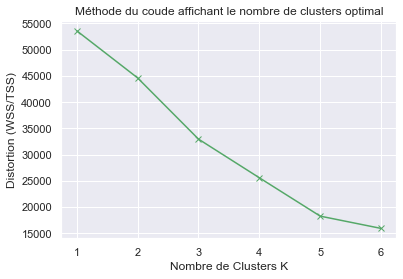

In [79]:
#Clustering

from sklearn.cluster import KMeans


# Recherche du nombre de Clusters
from scipy.spatial.distance import cdist

# Liste des nombre de clusters
range_n_clusters = [1,2,3,4,5,6,]  

# Initialisation de la liste de distortions
distortions = []

# Calcul des distortions pour les différents modèles
for n_clusters in range_n_clusters:
    
    # Initialisation d'un cluster ayant un pour nombre de clusters n_clusters
    cluster = KMeans(n_clusters = n_clusters)
    
    # Apprentissage des données suivant le cluster construit ci-dessus
    cluster.fit(df)
    
    # Ajout de la nouvelle distortion à la liste des données
    distortions.append(sum(np.min(cdist(df, cluster.cluster_centers_, 'euclidean'), axis=1)) / np.size(df, axis = 0))

# Visualisation des distortions en fonction du nombre de clusters
plt.plot(range_n_clusters, distortions, 'gx-')
plt.xlabel('Nombre de Clusters K')
plt.ylabel('Distortion (WSS/TSS)')
plt.title('Méthode du coude affichant le nombre de clusters optimal')
plt.show()



**Nous avons 3 clusters. Décrochement de la courbe, suivie d'une décroissance régulière après une décroissance accelérée**

In [80]:
#Entraînement du moèdle sur Algorithme de K-means avec N cluster 3

kmeans = KMeans(n_clusters = 3)
kmeans.fit(df)

# Centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

**Visualisation des clusters et des centroïdes**


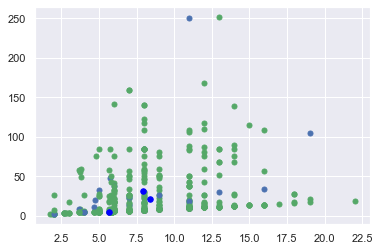

In [81]:
# Liste des couleurs
colors = ["g.","r.","b.","y"]

# Graphique du nuage de points attribués au cluster correspondant
for i in range(len(df)):
    plt.plot(df.iloc[i,0], df.iloc[i,1], colors[labels[i]], markersize = 10)

# Graphique des centroïdes
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "o", color = "blue",s=30, linewidths = 1, zorder = 10)
plt.show()


La Méthode des Kmeans ne semble pas performante